In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
X = df[['Annual Income (k$)','Spending Score (1-100)']].values

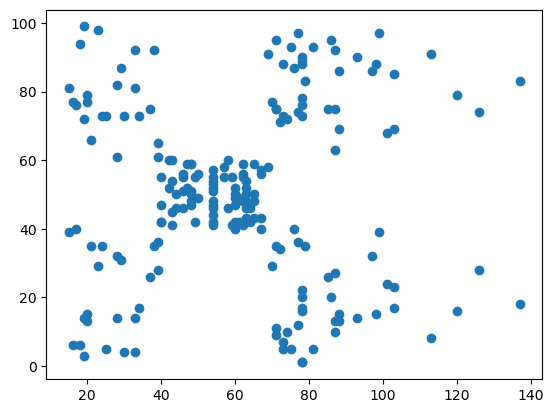

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [6]:
sse = []
n_group = []
for i in range(2,10):
    model = KMeans(n_clusters=i)
    model = model.fit(X)
    sse.append(model.inertia_)
    n_group.append(i)

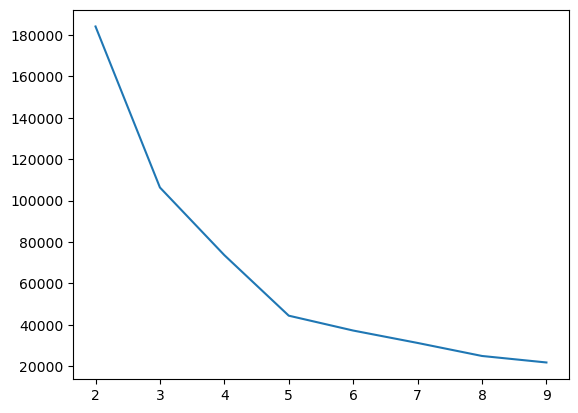

In [7]:
plt.plot(n_group,sse)
plt.show()

In [8]:
model = KMeans(n_clusters=5)
pred = model.fit_predict(X)

In [10]:
df['Group'] = pred
df['Group']

0      4
1      0
2      4
3      0
4      4
      ..
195    3
196    1
197    3
198    1
199    3
Name: Group, Length: 200, dtype: int32

In [11]:
centroid = model.cluster_centers_
centroid

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

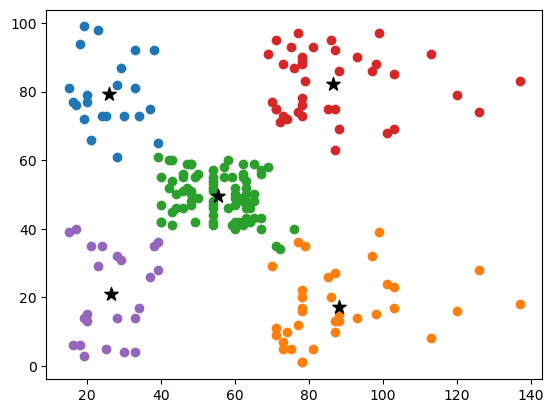

In [12]:
for i in range(5):
    data = df[df.Group == i].values
    data = data[:,-3:-1]
    x = data[:,0]
    y = data[:,1]
    plt.scatter(x,y)
    plt.scatter(centroid[i][0],centroid[i][1], color = 'black' ,marker = '*', s=100)
plt.show()
    